# Proyek Analisis Data: [E commerce public dataset]
- **Nama:** [Enggal Aryadwika]
- **Email:** [enggalaryadwika8@gmail.com]
- **ID Dicoding:** [enggalad]

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling banyak dibeli dan kurang diminati?
- Bagaimana kinerja penjualan di platform E-commerce



## Import Semua Packages/Library yang Digunakan

In [ ]:
# Install dan import packages/library
!pip install unidecode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.0 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

Membaca Dataset Customer

In [ ]:
# Membaca dataset customers
customers_url = "https://raw.githubusercontent.com/enggalaryadwika/dataecommerce/main/customers_dataset.csv"
customers_df = pd.read_csv(customers_url)
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Membaca dataset order items

In [ ]:
# Membaca dataset order items
order_items_url = "https://raw.githubusercontent.com/enggalaryadwika/dataecommerce/main/order_items_dataset.csv"
order_items_df = pd.read_csv(order_items_url)
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Membaca datasets order payments

In [ ]:
# Membaca dataset order payments
order_payments_url = "https://raw.githubusercontent.com/enggalaryadwika/dataecommerce/main/order_payments_dataset.csv"
order_payments_df = pd.read_csv(order_payments_url)
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Membaca datasets order reviews

In [ ]:
# Membaca dataset order reviews
order_reviews_url = "https://raw.githubusercontent.com/enggalaryadwika/dataecommerce/main/order_reviews_dataset.csv"
order_reviews_df = pd.read_csv(order_reviews_url)
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Membaca datasets order

In [ ]:
# Membaca dataset orders
orders_url = "https://raw.githubusercontent.com/enggalaryadwika/dataecommerce/main/orders_dataset.csv"
orders_df = pd.read_csv(orders_url)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Membaca datasets product category

In [ ]:

# Membaca dataset product category
product_category_url = "https://raw.githubusercontent.com/enggalaryadwika/dataecommerce/main/product_category_name_translation.csv"
product_category_df = pd.read_csv(product_category_url)
product_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Membaca datasets product

In [ ]:
# Membaca dataset products
products_url = "https://raw.githubusercontent.com/enggalaryadwika/dataecommerce/main/products_dataset.csv"
products_df = pd.read_csv(products_url)
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


Membaca datasets sellers

In [ ]:
# Membaca dataset sellers
sellers_url = "https://raw.githubusercontent.com/enggalaryadwika/dataecommerce/main/sellers_dataset.csv"
sellers_df = pd.read_csv(sellers_url)
sellers_df


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Assessing Data

In [ ]:
# Mengecek informasi pada dataframe
print('\n', customers_df.info())
print('\n', order_items_df.info())
print('\n', order_payments_df.info())
print('\n', order_reviews_df.info())
print('\n', orders_df.info())
print('\n', product_category_df.info())
print('\n', products_df.info())
print('\n', sellers_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null

Mengecek null pada dataframe

In [ ]:
# Mengecek nilai null pada dataframe
print('\nInformasi data null pada dataframe customers:\n', customers_df.isnull().sum())
print('\nInformasi data null pada dataframe order items:\n', order_items_df.isnull().sum())
print('\nInformasi data null pada dataframe order payments:\n', order_payments_df.isnull().sum())
print('\nInformasi data null pada dataframe order reviews:\n', order_reviews_df.isnull().sum())
print('\nInformasi data null pada dataframe orders:\n', orders_df.isnull().sum())
print('\nInformasi data null pada dataframe product category:\n', product_category_df.isnull().sum())
print('\nInformasi data null pada dataframe products:\n', products_df.isnull().sum())
print('\nInformasi data null pada dataframe sellers:\n', sellers_df.isnull().sum())


Informasi data null pada dataframe customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Informasi data null pada dataframe order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Informasi data null pada dataframe order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Informasi data null pada dataframe order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Informasi data null pada dataframe orders:
 order_id      

Mengecek duplikasi pada dataframe

In [ ]:
# Mengecek duplikasi data pada dataframe
print('\nInformasi duplikasi data pada dataframe customers:\n', customers_df.duplicated().sum())
print('\nInformasi duplikasi data pada dataframe order items:\n', order_items_df.duplicated().sum())
print('\nInformasi duplikasi data pada dataframe order payments:\n', order_payments_df.duplicated().sum())
print('\nInformasi duplikasi data pada dataframe order reviews:\n', order_reviews_df.duplicated().sum())
print('\nInformasi duplikasi data pada dataframe orders:\n', orders_df.duplicated().sum())
print('\nInformasi duplikasi data pada dataframe product category:\n', product_category_df.duplicated().sum())
print('\nInformasi duplikasi data pada dataframe products:\n', products_df.duplicated().sum())
print('\nInformasi duplikasi data pada dataframe sellers:\n', sellers_df.duplicated().sum())


Informasi duplikasi data pada dataframe customers:
 0

Informasi duplikasi data pada dataframe order items:
 0

Informasi duplikasi data pada dataframe order payments:
 0

Informasi duplikasi data pada dataframe order reviews:
 0

Informasi duplikasi data pada dataframe orders:
 0

Informasi duplikasi data pada dataframe product category:
 0

Informasi duplikasi data pada dataframe products:
 0

Informasi duplikasi data pada dataframe sellers:
 0


In [ ]:
# Mengecek ringkasan statistik pada dataframe
print('\nInformasi ringkasan statistik pada dataframe customers:\n', customers_df.describe(include='all'))
print('\nInformasi ringkasan statistik pada dataframe order items:\n', order_items_df.describe(include='all'))
print('\nInformasi ringkasan statistik pada dataframe order payments:\n', order_payments_df.describe(include='all'))
print('\nInformasi ringkasan statistik pada dataframe order reviews:\n', order_reviews_df.describe(include='all'))
print('\nInformasi ringkasan statistik pada dataframe orders:\n', orders_df.describe(include='all'))
print('\nInformasi ringkasan statistik pada dataframe product category:\n', product_category_df.describe(include='all'))
print('\nInformasi ringkasan statistik pada dataframe products:\n', products_df.describe(include='all'))
print('\nInformasi ringkasan statistik pada dataframe sellers:\n', sellers_df.describe(include='all'))


Informasi ringkasan statistik pada dataframe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

     

### Cleaning Data

In [ ]:
# Menampilkan berisi baris-baris di mana kolom 'review_comment_title' memiliki nilai yang tidak ada (NaN) pada dataframe 'order_reviews_df'
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
# Menghitung jumlah kemunculan setiap nilai unik dalam kolom 'review_comment_title' dari dataframe 'order_reviews_df'
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [ ]:
# Menampilkan baris-baris di mana kolom 'review_comment_message' memiliki nilai yang tidak ada (NaN) pada dataframe 'order_reviews_df'
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [ ]:

# Menghitung jumlah kemunculan setiap nilai unik dalam kolom 'review_comment_message' dari dataframe 'order_reviews_df'
order_reviews_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [ ]:
# Mengganti nilai NaN pada dataframe 'order_reviews_df' dengan 'no comment'
order_reviews_df.fillna(value="no comment", inplace=True)

In [ ]:
# Menampilkan baris-baris di mana kolom 'order_approved_at' memiliki nilai yang tidak ada (NaN) dari DataFrame 'orders_df'
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
# mengonversi nilai-nilai dalam kolom 'shipping_limit_date' dari DataFrame 'order_items_df' menjadi tipe data datetime menggunakan fungsi 'pd.to_datetime()'
datetime_a = ["shipping_limit_date"]

for column in datetime_a:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [ ]:
# Mengonversi nilai-nilai dalam kolom 'review_creation_date' dan 'review_answer_timestamp' dari DataFrame 'order_reviews_df' menjadi tipe data datetime menggunakan fungsi 'pd.to_datetime()'
datetime_b = ["review_creation_date","review_answer_timestamp"]

for column in datetime_b:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])


In [ ]:
# Mengonversi nilai-nilai dalam kolom-kolom yang terdaftar dalam list datetime_c dari DataFrame 'orders_df' menjadi tipe data datetime menggunakan fungsi 'pd.to_datetime()'
datetime_c = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_c:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
# Mengecek informasi pada dataframe 'order_items_df'
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# Mengecek informasi pada dataframe 'order_reviews_df'
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
# Mengecek informasi pada dataframe 'orders_df'
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

Explore Customer

In [ ]:
# Menampilkan 10 baris acak pada dataframe 'customers_df'
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
84645,61941d2c8a513b8b5bbfacc441fd9333,a62e0d6d1775ff1936a4eb52dbbedd00,19815,assis,SP
29406,fef79774a4f4ef014078bcb0b42d0cc5,c13401002a5f9b60befb4c720de50be0,41820,salvador,BA
22371,e93ae5839998dc27b7d5150889b9a2a0,78abeed824086fc471d411295775e50d,30130,belo horizonte,MG
18964,a667b0ccd3f9add3a9b796c66beda37f,8318024f29cee9ab3a09981a35fb8b63,4125,sao paulo,SP
34641,da07302b65923d201310f257a0f3798c,745a8079a4369fd584854b4a87a8b9c4,95880,estrela,RS
41151,750619a6b23aba34dd4aca4bf16ef038,213646dc5e7c5cd56f8a4237109c5d3b,38025,uberaba,MG
84239,f564a6977edca497bf999c9d025226df,5d23c71bf76c31367deeb350ec0ab6a4,2037,sao paulo,SP
75375,cb747ff2bbd153974250e103487644e5,529a8faa9d37064b655b398164e4fda7,5030,sao paulo,SP
55347,0ea03f60c89ca5678a23e6b3badcbb43,e4e4b8552ae792cc58e07b3360033016,9931,diadema,SP
19935,f9a6eae78eee9737f197727641c75f44,bcb2cbb9e368b1e6368890b1dd4ce80e,36200,barbacena,MG


In [ ]:
# Menampilkan ringkasan statistik dataframe 'customers_df'
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
# Menampilkan apakah kolom 'customer_id' pada dataframe 'customer_df' unik atau tidak
customers_df.customer_id.is_unique

True

In [ ]:
# Menampilkan apakah ada atau tidak duplikasi data kolom 'customer_id' pada dataframe 'customer_df'
customers_df.customer_id.duplicated().any()

False

In [ ]:
# Menampilkan jumlah pelanggan unik kolom 'customer_id' berdasarkan kota pada dataframe 'customers_df'
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
# Menampilkan jumlah pelanggan unik kolom 'customer_id' berdasarkan negara pada dataframe 'customers_df
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [ ]:
# Menampikan 10 baris acak pada dataframe 'order_payments_df'
order_payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
14294,f1a24be96cc3d824b45822be11fede0d,1,credit_card,4,93.32
35150,96f51ec3fb1b8781a86bfaf4a4c94494,1,credit_card,8,305.57
24895,a0c4e650ec3c9611c78fbaab9cf405a4,1,credit_card,1,494.42
16527,858dc2838532d6ec487b622925f25c56,1,boleto,1,55.00
86121,156164b0c009c68c766b1ce1213cee18,1,credit_card,10,313.50
16536,3b6f2bb4fdd0cd8b7b28696a70e0acc2,1,credit_card,1,38.01
81578,3a38a4a145c96019a17b640f053aecb9,1,boleto,1,260.36
100801,28dee43776d6b4f40164b3dfabb8abe8,1,credit_card,2,105.84
20735,563a48e2c7312a1aeefbbae15eb17521,1,boleto,1,55.27
65365,25dbad31db4b9059dd02d72929578d1c,1,credit_card,1,33.62


In [ ]:
# Menampilkan ringkasan statistik dataframe 'order_payments_df'
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
# Menampilkan jumlah order unik kolom 'cusorder_id' berdasarkan jenis pembayaran pada dataframe 'order_payments_df'
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

Explore order

In [ ]:
# Menampilkan 10 baris acak pada dataframe 'orders_df'
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1054,c57d8a1fea15380a18f9f81e1096ac9b,2ef4b4c4630ad3c0f379af495307470a,delivered,2018-06-01 23:24:48,2018-06-01 23:51:07,2018-06-04 14:00:00,2018-06-11 19:08:48,2018-07-05
82218,49db26941af1a612f2c08b71ea7d5c04,ff44ecf04f5df8c1e8976779abef2f92,delivered,2018-05-02 23:09:51,2018-05-03 00:13:05,2018-05-04 12:50:00,2018-05-12 10:38:24,2018-05-23
72178,6319f0da31d079b3614f52149b1632ac,8720d33d8bc5aeee786216aa733a89c5,delivered,2018-06-22 11:17:05,2018-06-22 11:39:41,2018-06-25 13:56:00,2018-07-03 20:44:25,2018-07-23
59604,962d7424fa1ac4663ef72969ce322fd8,9c92386cbe5876b71907d3bc7a17a6df,delivered,2018-01-18 14:29:05,2018-01-20 09:10:52,2018-01-26 09:32:46,2018-01-30 18:57:02,2018-02-21
51493,ba45b8302387142f547f4acd1c75b61d,a40f0cc059051cc7b1ba5465cad570ae,delivered,2018-08-03 12:28:36,2018-08-03 12:44:12,2018-08-08 15:06:00,2018-08-09 19:18:42,2018-08-08
53468,3d86b76dd4cf276f21ad4c62da992b5e,d122afa2eb34aa5560b4d786381110ee,delivered,2018-06-08 18:02:21,2018-06-08 20:42:01,2018-06-11 09:52:00,2018-06-16 16:22:21,2018-07-17
62755,e0206b3fc791d710a2498a32e0ba1310,b7617b17e670003050e435830b5e970a,delivered,2017-09-20 19:59:52,2017-09-20 20:10:25,2017-09-21 23:13:13,2017-10-05 14:14:28,2017-10-26
56617,3b33fee9a422ba92fb56025e07fe3db6,0dc8607bd2a9e3ba0f6f779a34fd8f1b,delivered,2017-06-04 21:33:39,2017-06-05 21:45:14,2017-06-07 14:47:14,2017-06-14 18:43:51,2017-06-28
26403,2e514f06a55a990840cf3f7131b45f55,4eb59d57e9c25a5d668bcea2100316a0,delivered,2018-07-20 12:16:53,2018-07-20 12:30:13,2018-07-23 10:04:00,2018-07-24 17:58:49,2018-08-07
26498,b94e9a3fad6a18ccc040e66e4bd271b4,5cc76dcf28ddfa1bf213e2353990789a,delivered,2017-09-12 18:42:37,2017-09-12 18:55:15,2017-09-13 20:38:09,2017-09-20 18:48:19,2017-10-03


In [ ]:
delivery_time = (orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]).dt.total_seconds()

# Konversi dari detik menjadi hari dan tambahkan ke dataframe 'orders_df'
orders_df["delivery_time_days"] = round(delivery_time / (24 * 60 * 60))

In [ ]:
# Menampilkan 10 baris acak pada dataframe 'orders_df'
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
61331,c186f4babae2b9ffa3ecc0176980acdf,e052a735fc6427b480edfe564268e3e6,unavailable,2017-05-30 20:29:08,2017-05-30 20:35:33,NaT,NaT,2017-06-22,NaN
79708,31001a77165dd554fcc32640defe98a1,cc3eee250369621d282cee76b06935e7,delivered,2017-11-27 08:51:19,2017-11-29 19:58:28,2017-12-06 16:43:15,2017-12-28 15:22:16,2017-12-21,22.0
12662,61195bf75f057881046ec1ee19f80037,6b389e2ed2c71985c9a40be057537959,delivered,2018-05-05 17:53:11,2018-05-05 18:13:39,2018-05-07 19:09:00,2018-05-08 20:12:05,2018-05-18,1.0
64515,aa99487411b30032936831e56c42da2f,74920bc93e60ed7786b3be5f8312b995,delivered,2018-06-09 16:05:49,2018-06-09 16:19:43,2018-06-14 15:11:00,2018-06-21 18:22:51,2018-07-12,7.0
13848,933824572e25f2482e2b59e73b1c9858,0f5a50334bda1f5cd66df24f8c4787ab,delivered,2018-07-04 22:45:03,2018-07-05 16:13:04,2018-07-05 10:21:00,2018-07-11 19:08:27,2018-08-06,6.0
44241,be6ead609261c3b92ba37751219cdb45,36cfd66391c517ba41486ff865a4d356,delivered,2017-03-19 15:42:48,2017-03-19 15:42:48,2017-03-29 13:59:48,2017-04-03 15:09:23,2017-04-10,5.0
94239,6889c740bbcca162beee27a55cbc56f4,c9c6721f8c8bbfa4b2b96de27d9fb3c0,delivered,2017-03-03 20:25:48,2017-03-03 20:43:28,2017-03-08 16:46:10,2017-03-13 11:30:55,2017-03-22,5.0
91661,262bf694d9c87de7844dd80b98fcfef3,cfdff1156078f85a811d067a6d07e80d,delivered,2018-03-08 09:27:31,2018-03-08 09:48:45,2018-03-12 20:32:10,2018-03-15 23:08:32,2018-04-10,3.0
50776,d9554774d0c090aecdde8498be40f246,50693b901fe3758bc5bc099d9c25cb08,delivered,2018-05-04 01:12:21,2018-05-04 01:32:03,2018-05-04 13:51:00,2018-05-11 21:20:03,2018-05-29,7.0
71886,34b1401adf2ab260c3adcf2c2be847dd,401501207df9d38d6119beffb7375741,invoiced,2018-04-01 12:55:19,2018-04-01 13:10:11,NaT,NaT,2018-04-17,NaN


<Axes: >

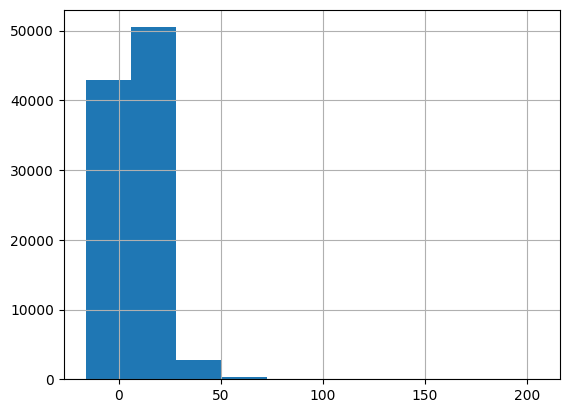

In [ ]:
# Membuat histogram kolom 'delivery_time_days' pada dataframe 'orders_df'
orders_df['delivery_time_days'].hist()

Merged customer_df dan order_df

In [ ]:

# Menggabungkan dataframe 'customers_df' dan 'orders_df' dengan left join
customer_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_orders_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,3.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,6.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,30.0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,10.0


In [ ]:
# Menghitung jumlah 'order_id' yang unik berdasarkan kota customer dalam dataframe 'customer_orders_df'
customer_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)


customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [ ]:
# Menghitung jumlah 'order_id' yang unik berdasarkan negara customer dalam dataframe 'customer_orders_df
customer_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [ ]:
# Menghitung jumlah 'order_id' yang unik berdasarkan kode pos customer dalam dataframe 'customer_orders_df
customer_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [ ]:
# Menghitung jumlah 'order_id' yang unik berdasarkan status order customer dalam dataframe 'customer_orders_df
customer_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Merged order_payment dan ordeer_review

In [ ]:
# Menggabungkan dataframe 'order_payments_df' dan 'order_reviews_df' dengan left join
order_payrev_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payrev_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39
...,...,...,...,...,...,...,...,...,...,...,...
104472,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,9f402e937d15b4664948410079ab687d,5.0,no comment,Tudo certo!,2018-03-17,2018-03-20 15:17:08
104473,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,f78d2909c6c202d3cabb8bac3fc00e75,5.0,no comment,no comment,2017-08-24,2017-08-25 19:38:31
104474,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,2cdb88f8dce688bb85e20a5cf069e589,1.0,no comment,no comment,2017-12-07,2017-12-07 09:00:59
104475,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,6c698e5d193ab18db7615ea75a28866e,5.0,no comment,no comment,2018-08-22,2018-08-23 15:29:34


In [ ]:
# Menghitung jumlah 'order_id' yang unik berdasarkan jenis pembayaran dalam dataframe 'order_payrev_df'
order_payrev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [ ]:
# Mengurutkan DataFrame order_payrev_df berdasarkan nilai pembayaran (payment_value) secara menurun.
order_payrev_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [ ]:
# Mengelompokkan dan melakukan agregasi data dalam DataFrame 'order_payrev_df'
order_payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Merged customer_order_df dan order_pauyrev_df

In [ ]:
# Menggabungkan dataframe 'customer_orders_df' dan 'order_payrev_df' dengan left join
customers_df = pd.merge(
    left=customer_orders_df,
    right=order_payrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104473,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4.0,Recomendo,no comment,2018-04-14,2018-04-28 11:15:04
104474,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1.0,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5.0,no comment,no comment,2018-04-12,2018-04-16 10:36:05
104475,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1.0,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1.0,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04,2018-05-08 01:41:07
104476,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1.0,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,no comment,no comment,2017-11-17,2017-11-19 23:34:18


Explore order_items_df dan sellers_df

In [ ]:
# Menggabungkan dataframe 'order_itemts_df' dan 'sellers_df' dengan left join
items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
items_sellers_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP


In [ ]:
# Menghitung jumlah 'seller_id' yang unik berdasarkan kota seller dalam dataframe 'items_sellers_df'
items_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

Explore products_df dan product_category_df

In [ ]:
# Menggabungkan dataframe 'products_df' dan 'product_category_df' dengan left join
products_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [ ]:
# Menghitung jumlah 'product_id' yang unik berdasarkan nama kategori produk dalam dataframe 'products_df'
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [ ]:
# Menghitung jumlah 'product_id' yang unik berdasarkan nama kategori produk english dalam dataframe 'products_df'
products_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

Merge products_df dan items_sellers_df

In [ ]:
# Menggabungkan dataframe 'products_df' dan 'items_sellers_df' dengan left join
sellers_df = pd.merge(
    left=products_df,
    right=items_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.90,16.11,13720,sao jose do rio pardo,SP
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720,sao jose do rio pardo,SP
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720,sao jose do rio pardo,SP
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.90,23.28,13720,sao jose do rio pardo,SP


In [ ]:
# Mengurutkan DataFrame sellers_df berdasarkan nilai harga (price) secara menurun.
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [ ]:
# Mengelompokkan dan melakukan agregasi data dalam DataFrame 'sellers_df'
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

Merged data

In [ ]:
# Menggabungkan dataframe 'customers_df' dan 'sellers_df' dengan left join
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,23.0,books_general_interest,1.0,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,17400.0,garca,SP
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,22.0,sports_leisure,1.0,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,14802.0,araraquara,SP
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,18.0,health_beauty,1.0,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,3304.0,sao paulo,SP
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,14.0,watches_gifts,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,14840.0,guariba,SP


In [ ]:
# Mengecek informasi pada dataframe 'all_data'
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [ ]:
# Mengelompokkan data berdasarkan kota pelanggan dan kategori produk dalam DataFrame 'all_data'
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})


price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [ ]:
# Mengelompokkan data berdasarkan negara pelanggan dan kategori produk dalam DataFrame 'all_data'
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [ ]:
# Mengelompokkan data berdasarkan negara pelanggan dalam DataFrame 'all_data'
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [ ]:
# Mengelompokkan data berdasarkan nama kategori produk dalam DataFrame 'all_data'
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})


order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

Konversi all data ke csv

In [ ]:
# Mengkonversi all data ke dalam format .csv
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana kinerja penjualan di E-commerce

In [ ]:
# Mengelompokkan data berdasarkan bulan dan menghitung jumlah order unik setiap bulannya
monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})

# Mengubah indeks tanggal menjadi nama bulan dalam format teks (e.g., 'January', 'February', dst.)
monthly_df.index = monthly_df.index.strftime('%B')

# Mereset indeks DataFrame dan mengubah nama kolom order_id menjadi order_count
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

# Menampilkan DataFrame
monthly_df

,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760
5,February,1765
6,March,2689
7,April,2374
8,May,3693
9,June,3252


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom order_count dan menjaga baris dengan nilai terakhir untuk setiap order_approved_at
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
monthly_df

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
17,February,6706
19,April,6778
20,May,7066
16,January,7187


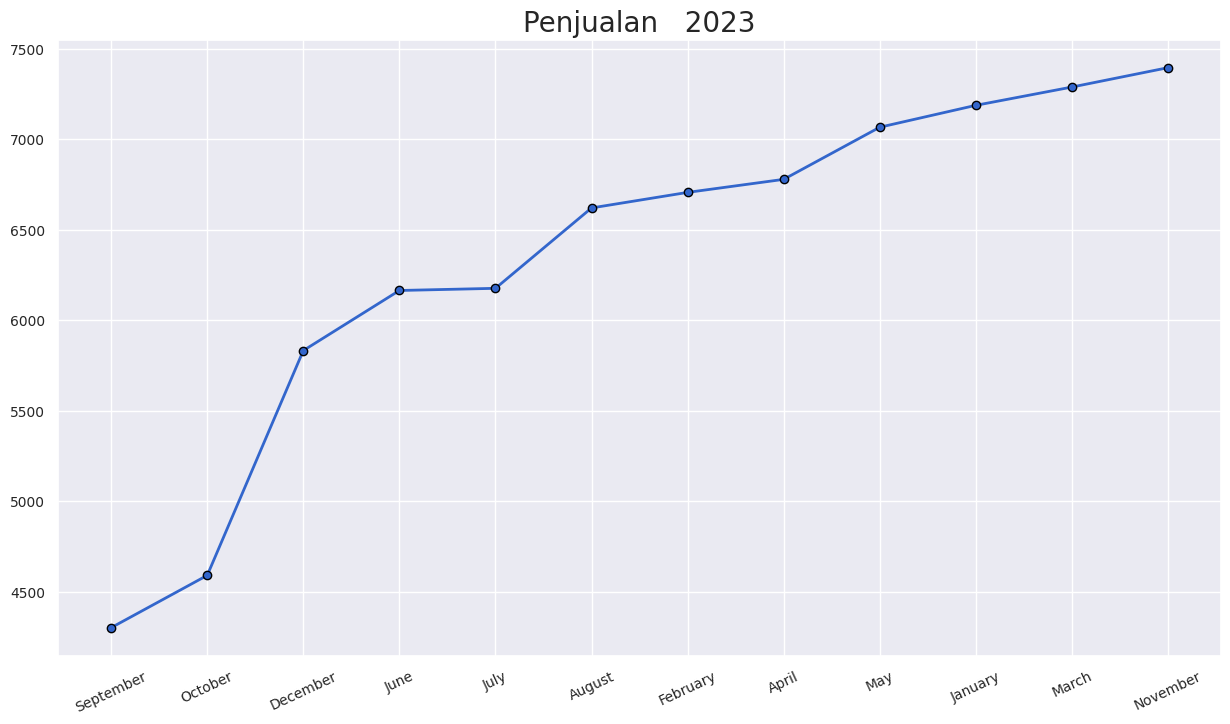

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#3366CC",
    linestyle='-',
    mec='black',
    mew=1
)
plt.title("Penjualan   2023", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:Produk apa yang paling banyak dibeli dan kurang diminati?

In [ ]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)

sum_order_items_df

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


<ipython-input-103-fe24073aa529>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-103-fe24073aa529>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])


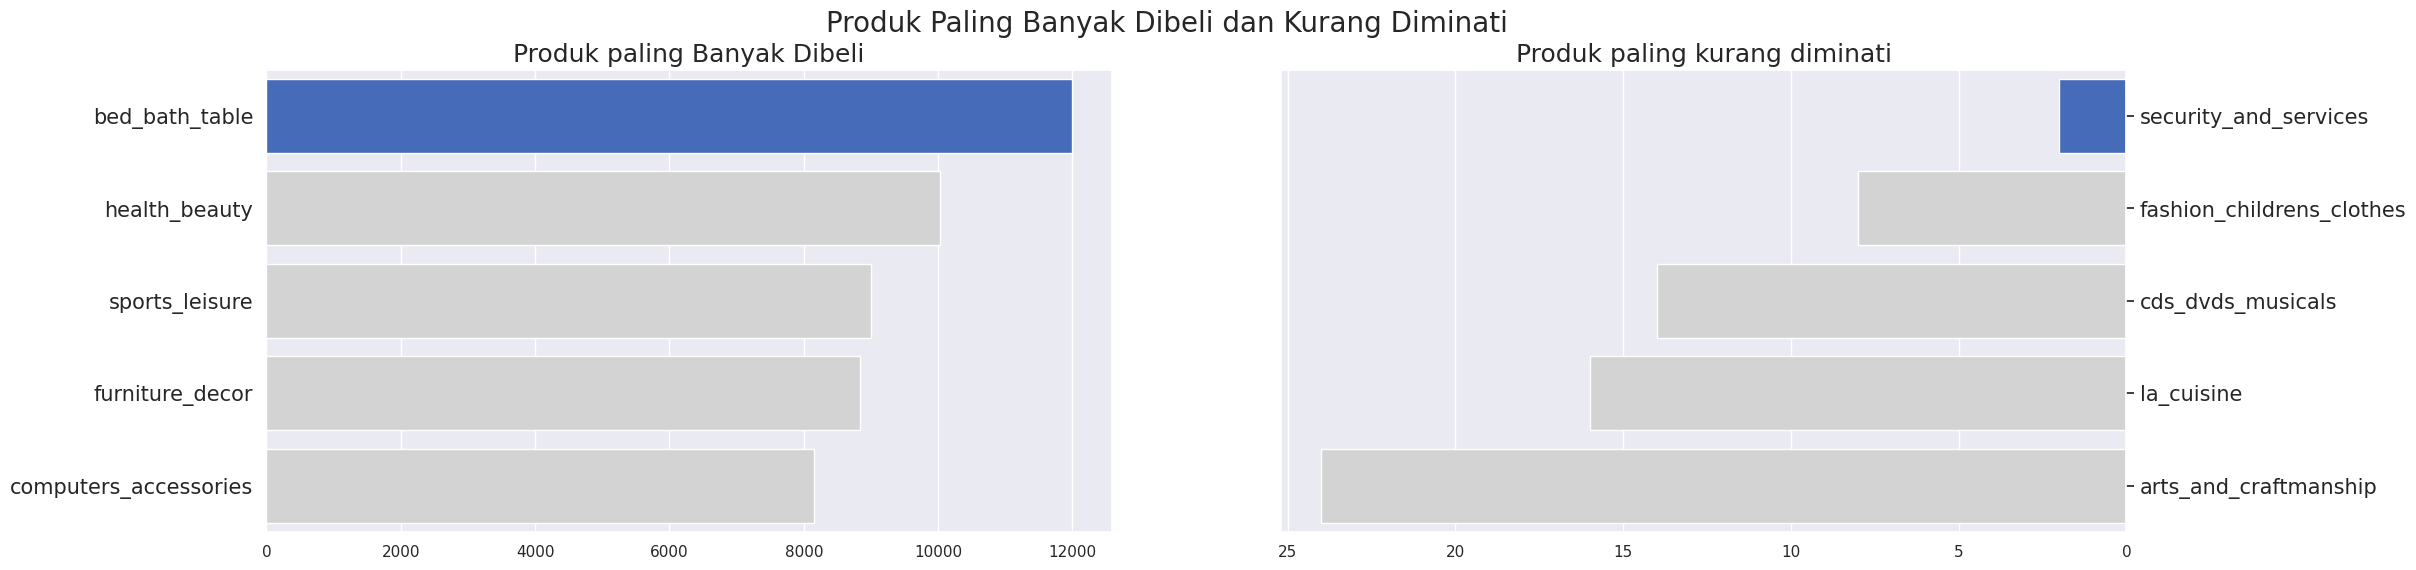

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3366CC", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling Banyak Dibeli", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling kurang diminati", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk Paling Banyak Dibeli dan Kurang Diminati", fontsize=20)
plt.show()

## Conclusion


- Bagaimana kinerja penjualan di platform E-Commerce?

Dari grafik tersebut, terlihat bahwa jumlah penjualan paling rendah terjadi pada bulan September, sementara terjadi peningkatan yang signifikan pada bulan November. Bulan November juga menunjukkan jumlah penjualan tertinggi dibandingkan bulan lainnya. Ini menunjukkan adanya pola musiman dalam perilaku pembelian pelanggan, dengan penjualan cenderung meningkat menjelang musim liburan, seperti Black Friday dan Natal. Oleh karena itu, untuk meningkatkan penjualan secara optimal, strategi pemasaran dan promosi dapat diperkuat secara lebih intensif menjelang bulan-bulan ramai seperti November. Sementara itu, pada bulan-bulan dengan penjualan rendah seperti September, strategi pemulihan atau promosi khusus dapat diterapkan untuk mendorong peningkatan penjualan.
- Produk mana yang paling banyak dibeli dan yang kurang diminati?




Dapat disimpulkan bahwa produk yang paling diminati adalah bed_bath_table, sedangkan produk yang paling kurang diminati adalah security_and_services. Ini menunjukkan adanya preferensi yang jelas di antara pelanggan terhadap jenis produk tertentu. Oleh karena itu, untuk meningkatkan kinerja penjualan dan memaksimalkan keuntungan, strategi pemasaran dan penjualan dapat disesuaikan untuk lebih menekankan promosi produk-produk yang paling diminati, seperti bed_bath_table. Di sisi lain, upaya dapat difokuskan untuk meningkatkan permintaan terhadap produk-produk yang kurang diminati, seperti security_and_services.


